# Load Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

** read data into jupyter notebook

In [2]:
df=pd.read_csv('C:\\Users\\bichon\\Downloads\\moviesnew.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


** check if there is any missing value

In [3]:
for col in df.columns:
    print(df[col].isnull().value_counts(), "\n")

False    7668
Name: name, dtype: int64 

False    7591
True       77
Name: rating, dtype: int64 

False    7668
Name: genre, dtype: int64 

False    7668
Name: year, dtype: int64 

False    7666
True        2
Name: released, dtype: int64 

False    7665
True        3
Name: score, dtype: int64 

False    7665
True        3
Name: votes, dtype: int64 

False    7668
Name: director, dtype: int64 

False    7665
True        3
Name: writer, dtype: int64 

False    7667
True        1
Name: star, dtype: int64 

False    7665
True        3
Name: country, dtype: int64 

False    5497
True     2171
Name: budget, dtype: int64 

False    7479
True      189
Name: gross, dtype: int64 

False    7651
True       17
Name: company, dtype: int64 

False    7664
True        4
Name: runtime, dtype: int64 



** check distribution

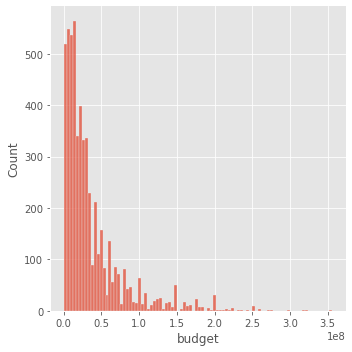

In [42]:
sns.displot(df['budget'])

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='budget'>

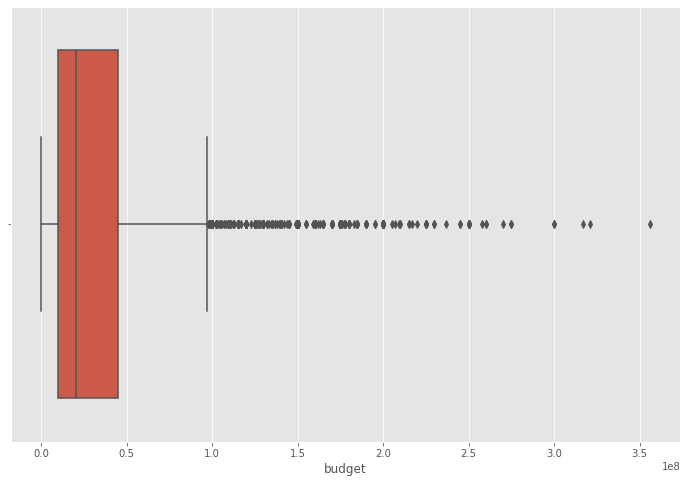

In [43]:
sns.boxplot(df.budget)

** Columns released, score, votes, writer, star, country, gross, company all have certain missing values. Column budget has the most missing value -- 2171 and the distribution is right skewed. Delete all missing values of all columns for below correlation analysis, but use median imputation for missing values for other analysis.

# Data Cleaning

In [6]:
df_corr=df.dropna()
df_corr

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [7]:
df_general=df.copy()

In [8]:
df_general1=df_general.fillna(df['budget'].median())
df_general1

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,20500000.0,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,20500000.0,20500000.0,90.0
7664,Dream Round,20500000.0,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000.0,20500000.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,20500000.0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,20500000.0,Embi Productions,20500000.0
7666,It's Just Us,20500000.0,Drama,2020,"October 1, 2020 (United States)",20500000.0,20500000.0,James Randall,James Randall,Christina Roz,United States,15000.0,20500000.0,20500000.0,120.0


In [9]:
df_corr.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

**change data types for columns-budget, gross

In [10]:
df_corr['budget']=df_corr['budget'].astype('int64')
df_corr['gross']=df_corr['gross'].astype('int64')

C:\Users\bichon\AppData\Local\Temp\ipykernel_12096\3416313727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['budget']=df_corr['budget'].astype('int64')
C:\Users\bichon\AppData\Local\Temp\ipykernel_12096\3416313727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['gross']=df_corr['gross'].astype('int64')


In [11]:
df_corr.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0


In [12]:
df_general1['budget']=df_general1['budget'].astype('int64')
df_general1['gross']=df_general1['gross'].astype('int64')

** deal with duplicates

In [13]:
df_corr=df_corr.drop_duplicates()
df_corr

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [14]:
df_general1=df_general1.drop_duplicates()


## Exploratory data analysis

**check correlations among columns

In [15]:
corr=df_corr.corr()
corr

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


[Text(0.5, 1.0, 'Correlation Matrix')]

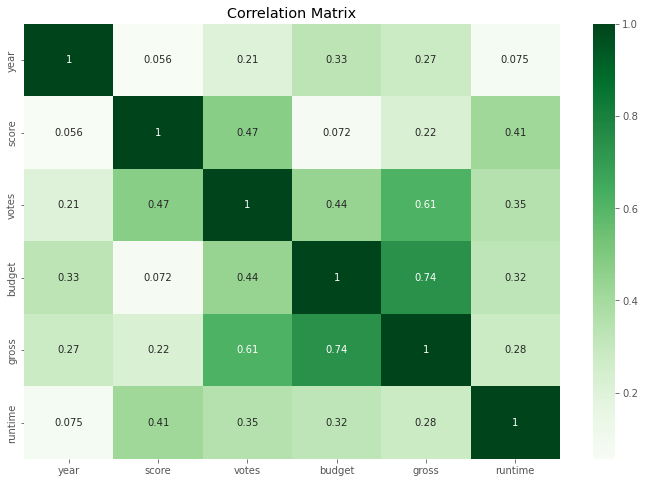

In [16]:
sns.heatmap(corr,data=df_corr,cmap='Greens',annot=True).set(title='Correlation Matrix')

** Buget and gross have the most strongest posive correlations. That is 0.74. Following by this, votes and gross have second strongest positive correlations--0.61.

[Text(0.5, 1.0, 'Correlation: Budget vs Gross')]

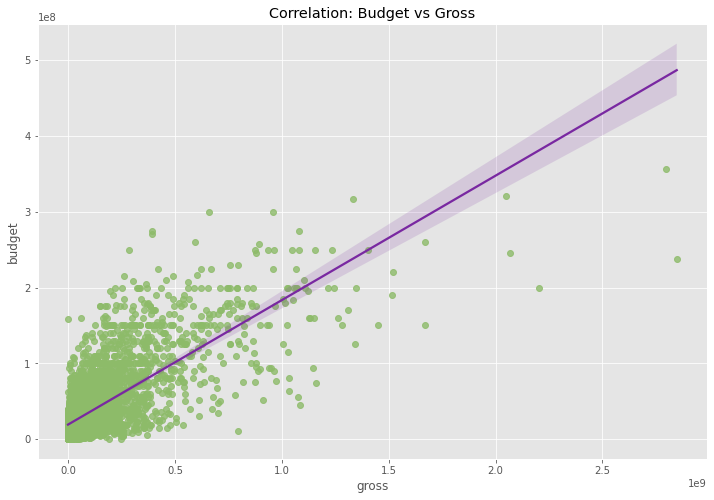

In [17]:
sns.regplot(x="gross", y="budget", data=df_corr,scatter_kws={"color": "#8dbb69"}, line_kws={"color": "#7928a1"}).set(title='Correlation: Budget vs Gross')

[Text(0.5, 1.0, 'Correlation: Votes vs Gross')]

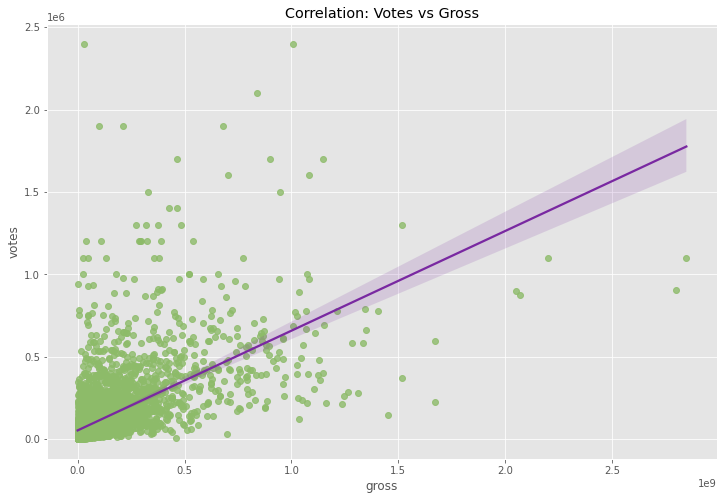

In [18]:
sns.regplot(x="gross", y="votes", data=df_corr,scatter_kws={"color": "#8dbb69"}, line_kws={"color": "#7928a1"}).set(title='Correlation: Votes vs Gross')

** The scatter plot confirmed the correlations mentioned above, but there were some outliers which affects the Pearson correlation coefficiency. Therefore, it makes correlation analys is not the most reliable method for analyzing this. 

**general analysis

<AxesSubplot:xlabel='count', ylabel='country'>

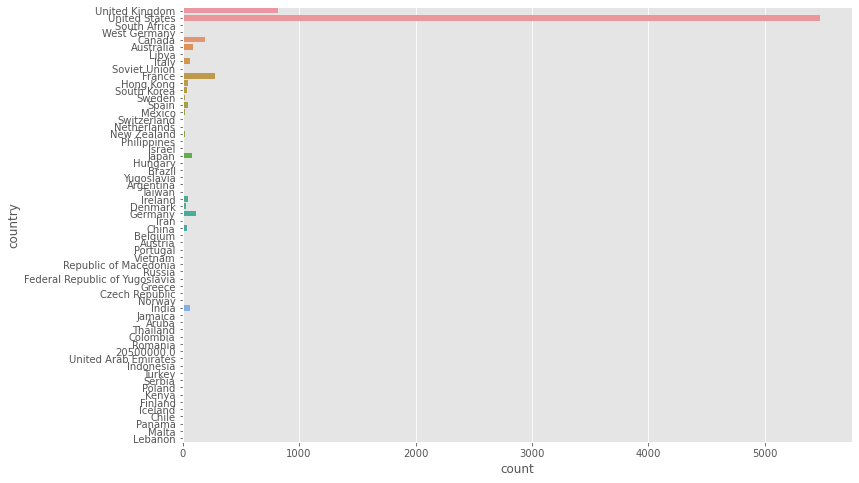

In [19]:
sns.countplot(y='country',data=df_general1)

** United States, UK, France, and Canada make the most movies.

In [20]:
query1=df_general1['score']>=8.5

In [21]:
df_new=df_general1[query1][['name','country','genre','year']]
df_new.shape

(40, 4)

** There are 40 popular movies with high rating in the past 30 years.

(-1.1006187243499144,
 1.1129928315116755,
 -1.1051491359899746,
 1.1084624198716153)

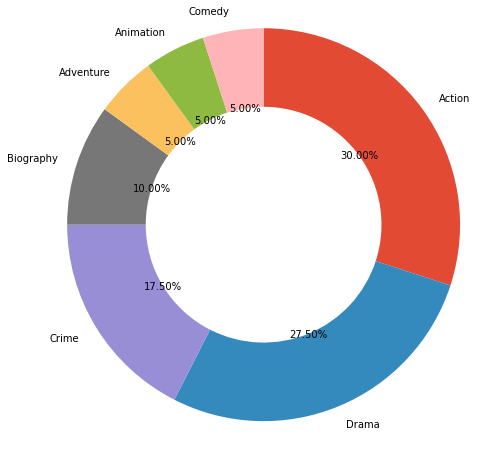

In [22]:
sorted_counts = df_new['genre'].value_counts()
plt.pie(sorted_counts,autopct='%0.2f%%', labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')

**Action, Drama, Crime movies consitute 75% of the total number of high rated movies from 1980 to 2020.

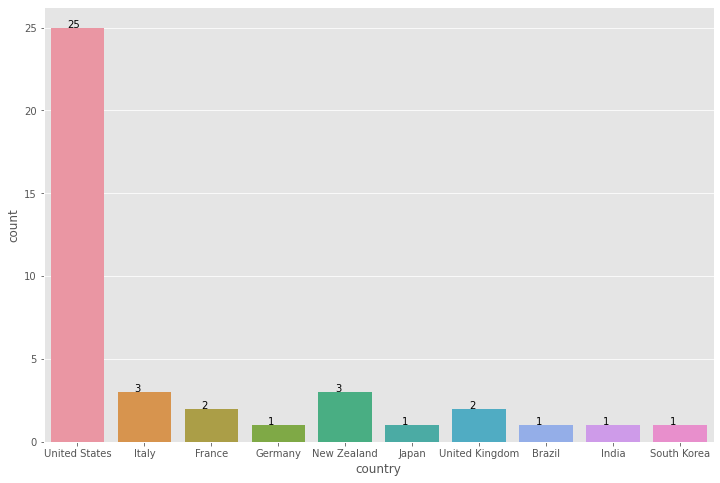

In [23]:
ax=sns.countplot(x='country',data=df_new)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


** For the 40 high rated movies, United States contributed 25 of it, and Italy contributed 3.

<AxesSubplot:xlabel='year', ylabel='count'>

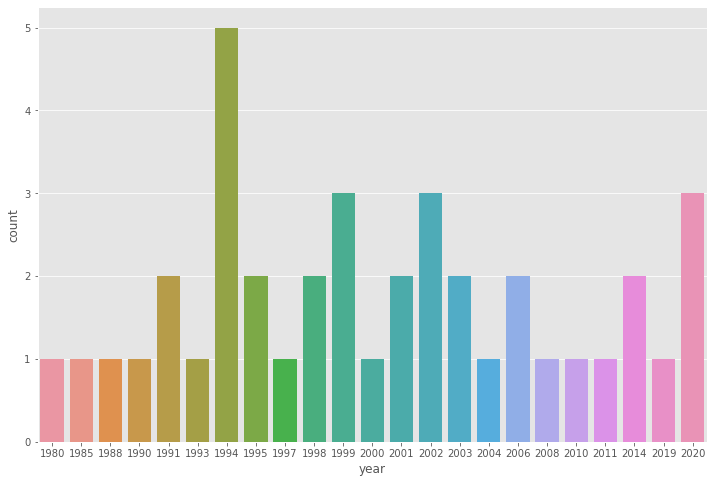

In [24]:
sns.countplot(x='year',data=df_new)


** For the 40 high rated movies, the year 1994 has 5 of them, the year 1999, 2002 and 2020 all have 3.

**trend analysis

*** aggregate data first and group it by year

In [45]:
df_aggregated = df_general1.groupby(df_general1['year']).agg({'budget': ['sum'], 'gross': ['sum'], 'score': ['mean'],'name': ['count']})

df_aggregated.head(5)

,budget,gross,score,name
,sum,sum,mean,count
year,,,,
1980,1491350000,2709166964,6.304348,92
1981,1631950000,2704564889,6.302655,113
1982,1902670000,3331080517,6.292063,126
1983,2021475562,3078004626,6.022917,144
1984,2694826000,3738092196,6.186905,168


** use lineplot to visualize the trend of gross and budget per year

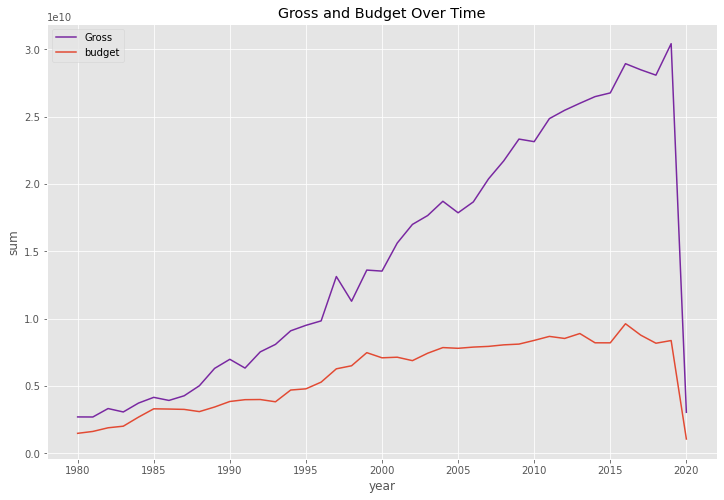

In [27]:
sns.lineplot(x='year',y=df_aggregated['gross']['sum'], data=df_aggregated,color='#7928a1')
sns.lineplot(x='year',y=df_aggregated['budget']['sum'], data=df_aggregated)

plt.title('Gross and Budget Over Time')
plt.legend(labels=['Gross','budget'])

**Gross can be significantly higher than budget, especially in the latter years, the actual change in the budget can be difficult to see. 
Thus, we can adjust the scale by using logarithmic values of the variables.

Text(0.5, 1.0, 'Gross and Budget Over Time (Logarithmic Scale)')

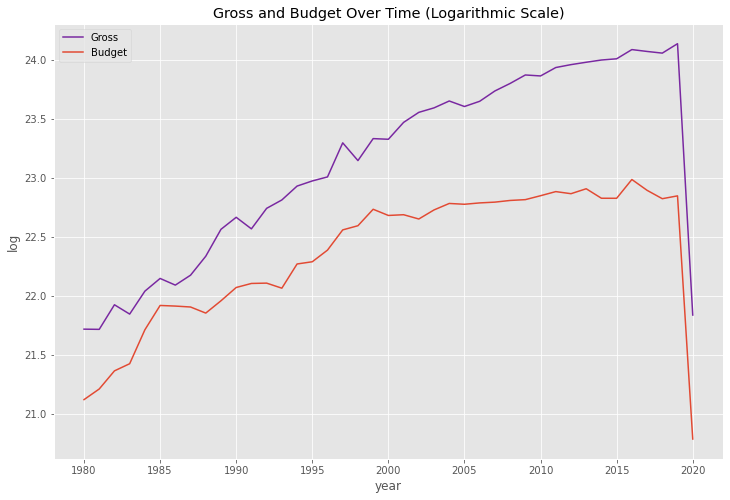

In [28]:
log_gross = np.log(df_aggregated['gross']['sum'])
log_budget = np.log(df_aggregated['budget']['sum'])

sns.lineplot(data=df_aggregated,x='year',y=log_gross,color='#7928a1')
sns.lineplot(data=df_aggregated, x='year', y=log_budget)
plt.ylabel('log')
plt.legend(labels=['Gross','Budget'])
plt.title('Gross and Budget Over Time (Logarithmic Scale)')

**The graph above illustrates that the film industry experienced consistent growth for the most part. However, it faced a drastic decline in both the budget and the gross in 2020 due to the breakout of pandemic.

The End~